# Exercise 8) Part 1: Image classification

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

## Loading the Fashion-MNIST dataset

In [2]:
# Load the dataset using Keras
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Shape of training images?
x_train.shape

(60000, 28, 28)

In [ ]:
# Shape of training labels?
y_train.shape

(60000,)


## Preprocessing

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
# Scale values to [0, 1]
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

## Let's have a look at the data

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

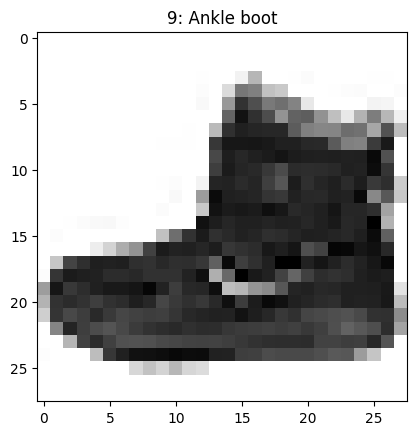

In [ ]:
# First training sample
idx = 0
img = x_train[idx]
label = y_train[idx]

# Plot image with class label


# Plot image with class label
plt.imshow(img, cmap="binary")
plt.title(f"{label}: {class_names[label]}")
plt.show()

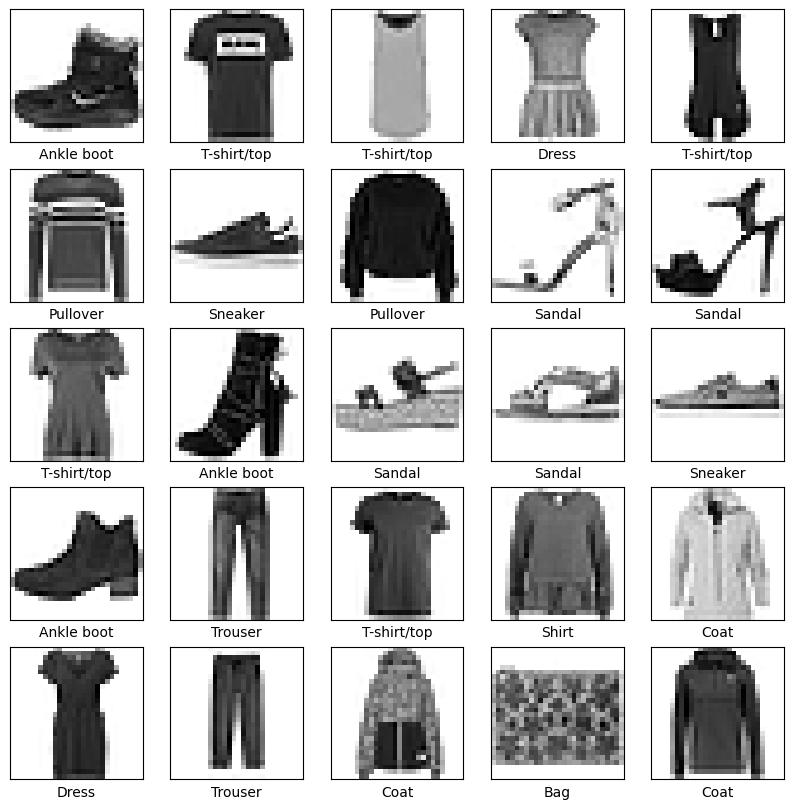

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Model evaluation 1) Training & validation set

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/holdout-validation_01.png" width="1000" align="left">

In [ ]:
# !pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


## Building a Multi-Layer Perceptron (MLP)
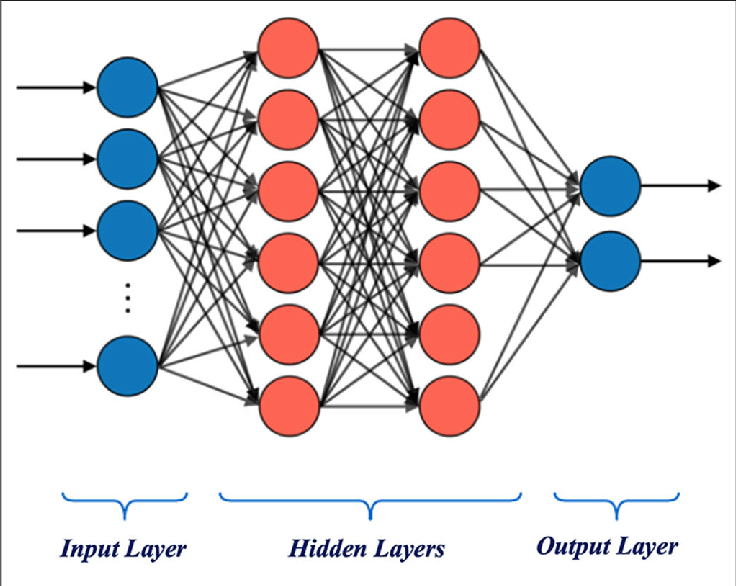

In [ ]:
import tensorflow as tf
from keras import layers

def build_model():
    # MLP with 2 hidden layers (256, 128 units) and "relu" activation function
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(256,activation="relu"))
    model.add(layers.Dense(128,activation="relu"))
    model.add(layers.Dense(10,activation="softmax"))
    return model










model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras import optimizers

# Choose optimizer & loss function and compile the model
opt = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])




In [ ]:
# Train the model for 50 epochs
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6604 - loss: 1.0545 - val_accuracy: 0.8070 - val_loss: 0.5545
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8229 - loss: 0.5186 - val_accuracy: 0.8357 - val_loss: 0.4770
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8413 - loss: 0.4547 - val_accuracy: 0.8458 - val_loss: 0.4429
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8485 - loss: 0.4323 - val_accuracy: 0.8544 - val_loss: 0.4243
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8568 - loss: 0.4141 - val_accuracy: 0.8565 - val_loss: 0.4030
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8635 - loss: 0.3906 - val_accuracy: 0.8597 - val_loss: 0.3974
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3760 - val_accuracy: 0.8642 - val_loss: 0.3815
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0.3664 - 

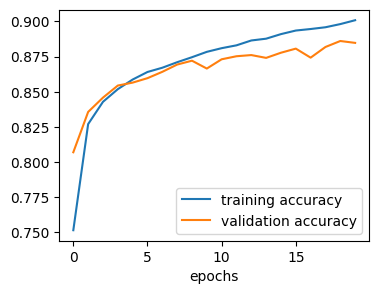

In [ ]:
# Plot accuracy
plt.figure(figsize=(4, 3))
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.show()

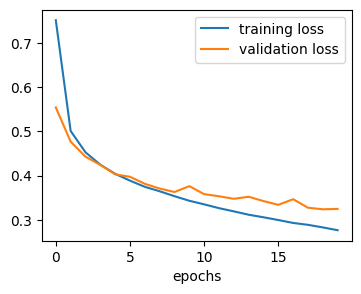

In [ ]:
# Plot loss
plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("epochs")
plt.show()

**How to interpret the loss curve?**

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*lARssDbZVTvk4S-Dk1g-eA.png" width=500 align="left">

## Check how well the model does on our test data

In [ ]:
# Get predictions for test data
y_predicted = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Get prediction for a test image
img = x_test[12]
pred = y_predicted[12]
true_class = y_test[12]

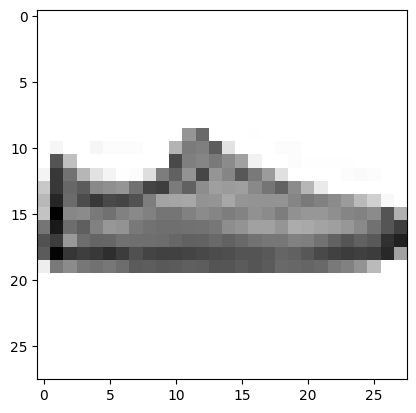

In [ ]:
plt.imshow(img, cmap="binary")

In [ ]:
print(class_names[true_class], true_class)

Sneaker 7


In [ ]:
pred

array([1.6667755e-05, 3.3611625e-05, 6.5085733e-05, 3.0168211e-03,
       1.5300851e-05, 8.1693828e-01, 6.1075912e-06, 1.6575801e-01,
       1.4050249e-02, 9.9791410e-05], dtype=float32)

<br><br><br><br><br><br><br><br><br><br>

In [ ]:
# Why does the prediction look like this? -> softmax activation, 10 classes
for i in range(10):
    print(f"{pred[i]:.2f} - {class_names[i]}")

0.00 - T-shirt/top
0.00 - Trouser
0.00 - Pullover
0.00 - Dress
0.00 - Coat
0.82 - Sandal
0.00 - Shirt
0.17 - Sneaker
0.01 - Bag
0.00 - Ankle boot


In [ ]:
# Highest value?
pred.max(

)

0.8169383

In [ ]:
# Which class has the highest prediction?
class_names[pred.argmax()]

'Sandal'

In [ ]:
# Turn all predictions into predicted classes (0, 1, 2 ... or 9)
predicted_classes = np.argmax(y_predicted,axis=-1)

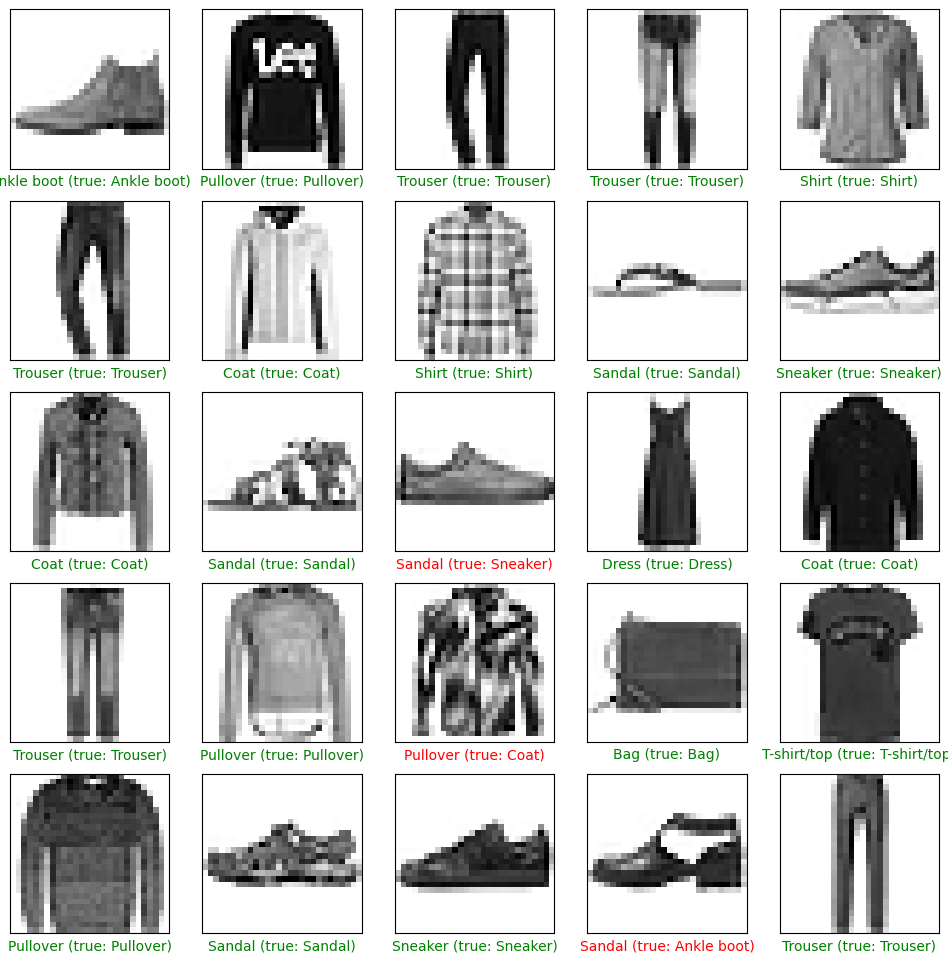

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(25):

    # Get true class for current image
    true_class = class_names[y_test[i]]

    # Get prediction
    prediction = y_predicted[i]
    predicted_class = class_names[np.argmax(prediction)]

    text = f"{predicted_class} (true: {true_class})"

    color = "green" if predicted_class == true_class else "red"

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap="binary")
    plt.xlabel(text, color=color)
plt.show()

In [ ]:
# Get accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.3491
Test accuracy: 87.69%


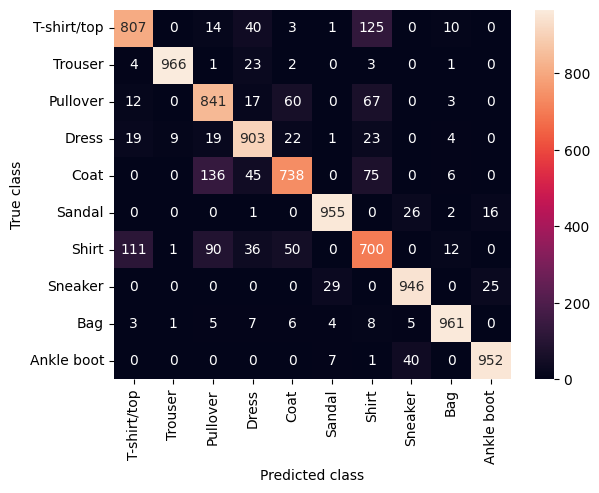

In [ ]:
# Show confusion matrix for test dataset
conf_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_classes)


sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

## Model evaluation 2) k-fold cross-validation

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/kfold.png" width="600" align="left">

In [ ]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()
x = x / 255.0
x_test = x_test / 255.0

In [ ]:
# Set up 5-fold cross-validation
kfold = sklearn.model_selection.KFold(n_splits=5,shuffle= True)

accuracy_list = []
fold = 1

for train_idx, val_idx in kfold.split(x_train):

    # Training folds
    x_train = x[train_idx]
    y_train = y[train_idx]

    # Validation fold
    x_val = x[val_idx]
    y_val = y[val_idx]



    # MLP
    model = build_model()
    opt = optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    # Train
    model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=0)
    # Evaluate
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

    print(f"Fold {fold}: Accuracy {val_acc:.4f}")
    accuracy_list.append(val_acc)
    fold += 1

Fold 1: Accuracy 0.8504
Fold 2: Accuracy 0.8458
Fold 3: Accuracy 0.8477
Fold 4: Accuracy 0.8487
Fold 5: Accuracy 0.8600


In [ ]:
# Get average validation accuracy
mean_val_accuracy= np.mean(accuracy_list)*100
print(f"Mean validation accuracy (5-fold CV): {mean_val_accuracy:.2f} %")

Mean validation accuracy (5-fold CV): 85.05 %


<br><br><br>


# Part 2: Image segmentation

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Function to load and preprocess images and masks
def load_data(image_dir, mask_dir, img_size=(128, 128)):
    images = []
    masks = []

    for i in range(100):  #  0 to 99
        img_path = os.path.join(image_dir, f"{i}.png")
        mask_path = os.path.join(mask_dir, f"{i}_seg.png")

        if os.path.exists(img_path) and os.path.exists(mask_path):
            # Load image and mask
            img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=img_size)
            mask = tf.keras.utils.load_img(mask_path, color_mode="grayscale", target_size=img_size)

            # Convert to numpy arrays and normalize
            img = np.array(img) / 255.0
            mask = np.array(mask) / 255.0

            # Expand dims for channel consistency
            images.append(np.expand_dims(img, axis=-1))
            masks.append(np.expand_dims(mask, axis=-1))

    return np.array(images), np.array(masks)

# Dataset paths
image_dir = "/content/Dataset/"  # Update with your directory
mask_dir = "/content/Dataset/"    # Update with your directory

# Load dataset
images, masks = load_data(image_dir, mask_dir)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

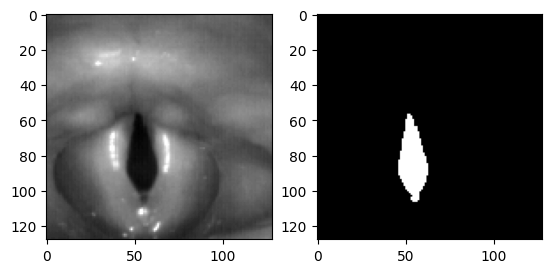

In [ ]:
import matplotlib.pyplot as plt

# Plot training image with mask (glottis)
def show_image_and_mask(x, y):
    plt.subplot(1,2,1)
    plt.imshow(x[...,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(y[...,0], cmap='gray')
    plt.show()


show_image_and_mask(X_train[0], y_train[0])

## Build U-Net

**Original U-Net:**

Ronneberger, O., Fischer, P., & Brox, T. (2015, October). U-net: Convolutional networks for biomedical image segmentation. In _International Conference on Medical image computing and computer-assisted intervention_ (pp. 234-241). Springer, Cham.
    
<img align="left" src=https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png width=500>

In [ ]:
# Simplified U-Net
# (2 encoder & decoder blocks, 16 initial filters)
from keras.layers import Conv2D, Input, MaxPool2D, UpSampling2D, Activation, BatchNormalization, Concatenate
from keras.models import Model
def conv_block(x, num_filters):
  # Convolutional layer with kernel size 3, padding "same"
  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  # Convolutional layer with kernel size 3, padding "same"
  x = Conv2D(num_filters, 3, padding="same")(x)
  # BatchNormalization layer
  x=BatchNormalization()(x)
  # Activation function "relu"
  x = Activation("relu")(x)
  return x


def build_Unet(filters=16, num_classes=1):
    # Input layer
    inputs = Input(shape=(128, 128, 1))
    # Encoder
    e1 = conv_block(inputs,filters)
    p1 = MaxPool2D((2,2))(e1)
    e2 = conv_block(p1,filters*2)
    p2= MaxPool2D((2,2))(e2)

    # Bottleneck
    b1 = conv_block(p2,filters*16)

    # Decoder
    d1 = UpSampling2D()(b1)
    d1 = Concatenate(axis=3)([d1,e2])
    d1 = conv_block(d1,filters*8)

    d2 = UpSampling2D()(d1)
    d2 = Concatenate(axis=3)([d2,e1])
    d2 = conv_block(d2,filters*4)



    # Output layer
    outputs = Conv2D(filters = num_classes,kernel_size=1,padding="same",activation="sigmoid")(d2)

    return Model(inputs, outputs)

## Train U-Net

A great library for image segmentation: https://segmentation-models.readthedocs.io/

In [ ]:
# Build U-Net model
model = build_Unet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=16,
    epochs=50
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 852ms/step - accuracy: 0.8018 - loss: 0.5329 - val_accuracy: 0.9945 - val_loss: 0.6624
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9929 - loss: 0.1800 - val_accuracy: 0.2568 - val_loss: 0.7368
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9950 - loss: 0.1216 - val_accuracy: 0.0706 - val_loss: 0.9156
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9944 - loss: 0.1029 - val_accuracy: 0.0470 - val_loss: 0.9444
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9952 - loss: 0.0840 - val_accuracy: 0.0633 - val_loss: 0.8098
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9945 - loss: 0.0785 - val_accuracy: 0.7772 - val_loss: 0.6332
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9945 - loss: 0.0691 - val_accuracy: 0.9943 - val_loss: 0.5200
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9955 - loss: 0.0604 - val_accuracy: 0.9945 - val_los

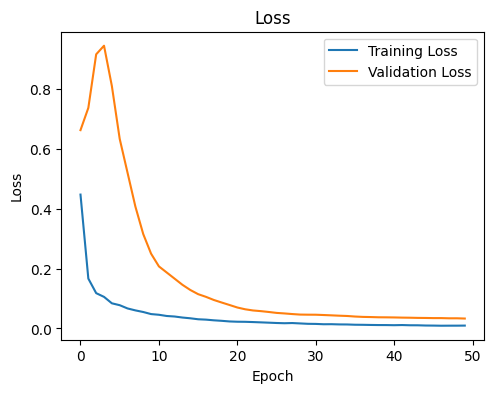

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


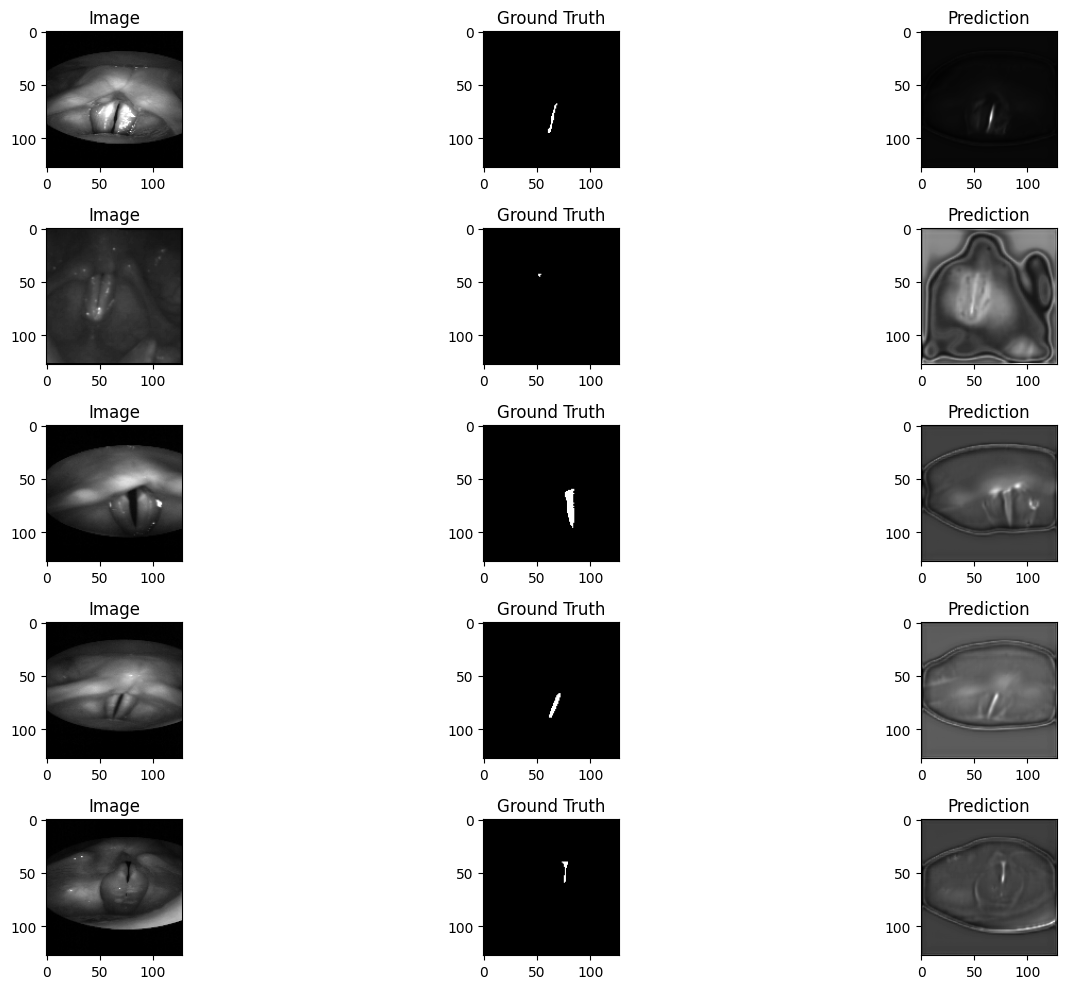

In [ ]:
def visualize_predictions(model, X, y):
    predictions = model.predict(X[:5])
    plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        plt.title("Image")

        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(y[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")

        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title("Prediction")

    plt.tight_layout()
    plt.show()

visualize_predictions(model, X_val, y_val)


##Big Unet trained on big Dataset

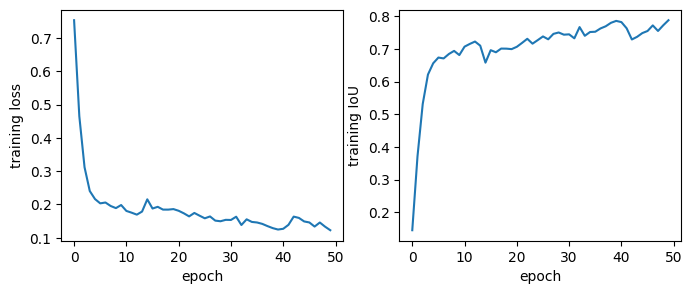

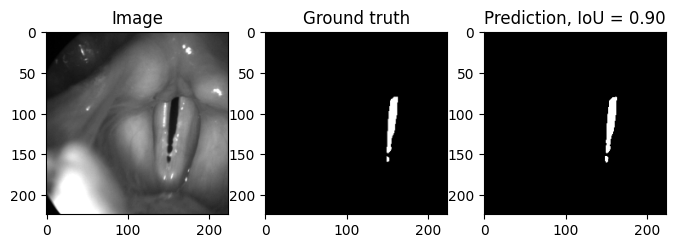